# Credit Card Fraud Detection

## Problem Statement

Developing a machine learning model to accurately detect fraudulent credit card transactions, aiming to minimize both false positives and false negatives, thereby protecting consumers and financial institutions from financial losses and maintaining trust in credit card usage.

### `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

### Business and Data Understanding

**Objective(s):** Maximize the convenience of Credit Card Fraud Detection

**Constraint(s):** Minimize the False Negetives and False Positives to avoid unnecessary inconvenience to legitimate customers

**Success Criteria:**

- **Business Success Criteria:** Reduce the Credit Card Fraud transactions and improve the user experience for legitimate customers. 

- **Machine Learning Success Criteria:** Achieve model accuracy atleast **90%**. Balanced performance to minimize both false positives (legitimate transactions flagged as fraud) and false negatives (fraudulent transactions not flagged).

- **Economic Success Criteria:** Financial organization who provide credit card services should achieve increase in business revenue when compared to previous business. 


### Data Collection/Description

**Data:** The Credit Card Fraud Detection Dataset is provided by Kaggle and publicly available to use

**Data Dictionary:**
- Dataset contains 31 columns/features
- Dataset contains 284807 records

**Description:**
- **Id** - Unique identifier for each transaction
- **Time** - Number of seconds elapsed between this transaction and the first transaction in the dataset
- **V1 - V28** - PCA dimensionality reduction data to protect user identities and sensitive features
- **Amount** - The transaction amount
- **Class** - Binary label indicating whether the transaction is fraudulent (1) or not (0)

### Importing required dependencies 

In [51]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, f1_score
import joblib
import pickle

### Loading Dataset

In [2]:
credit_card_data = pd.read_csv(r"C:\Users\USER\Downloads\creditcard.csv")

In [3]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory Data Analysis

In [27]:
#deriving descriptive analysis using D-tale library
# pip install dtale
import dtale
 
d = dtale.show(credit_card_data)
d.open_browser()

SyntaxError: invalid syntax (1954530932.py, line 2)

In [4]:
# dataset Informatiom 
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card_data.shape

(284807, 31)

In [6]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Preparation/Preprocessing 

#### Dealing with Missing Values 

In [7]:
# Check Missing Values for each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Duplicate check and removing duplicates

In [8]:
credit_card_data.duplicated().sum()

1081

In [9]:
#as we can see duplicates we need to remove them 
credit_card_data=credit_card_data.drop_duplicates()

In [10]:
credit_card_data.duplicated().sum()

0

In [11]:
credit_card_data.var()

Time      2.254450e+09
V1        3.794806e+00
V2        2.711631e+00
V3        2.276121e+00
V4        1.999916e+00
V5        1.896152e+00
V6        1.774039e+00
V7        1.507159e+00
V8        1.390169e+00
V9        1.200104e+00
V10       1.158653e+00
V11       1.037791e+00
V12       9.893773e-01
V13       9.908802e-01
V14       9.067136e-01
V15       8.370304e-01
V16       7.633453e-01
V17       7.098186e-01
V18       7.012011e-01
V19       6.615847e-01
V20       5.928757e-01
V21       5.240448e-01
V22       5.249734e-01
V23       3.890047e-01
V24       3.667837e-01
V25       2.716706e-01
V26       2.323750e-01
V27       1.566132e-01
V28       1.076015e-01
Amount    6.269988e+04
Class     1.664328e-03
dtype: float64

#### This dataset is highly baised data

0 -> Valid Transaction
1 -> Fraud Transaction

### Graphical Representation

#### Histogram to understand the Pattern of Data

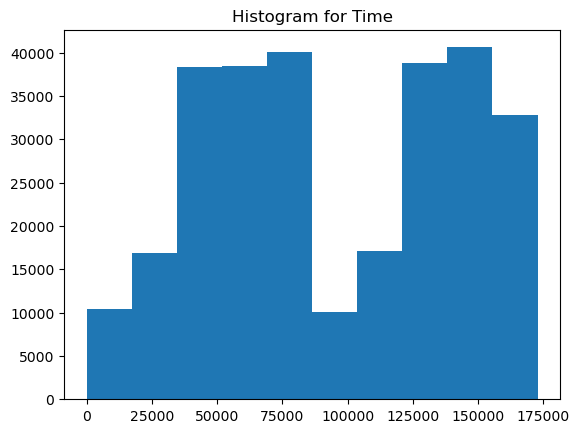

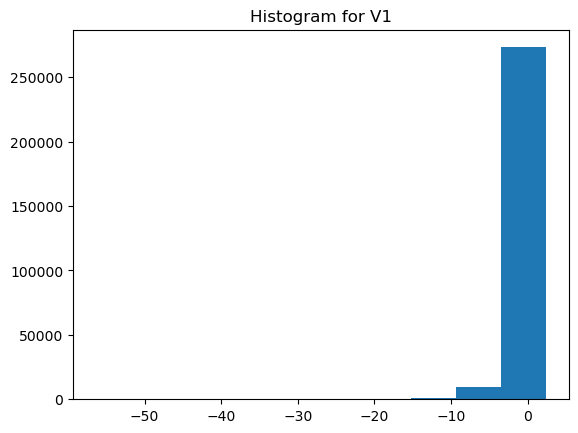

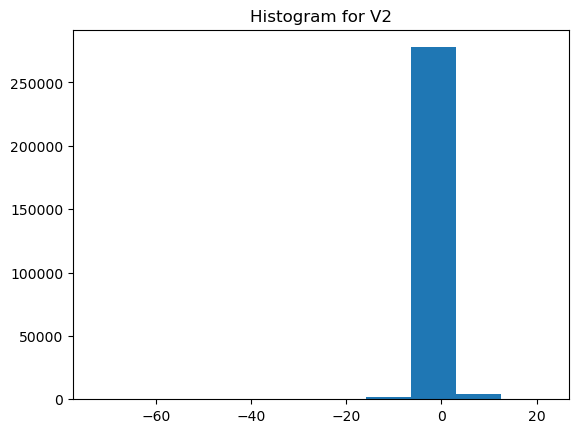

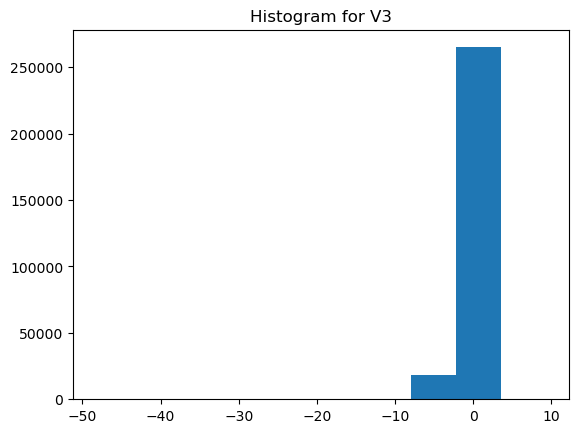

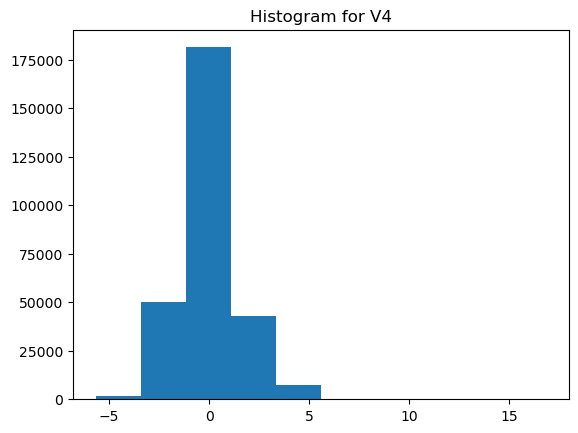

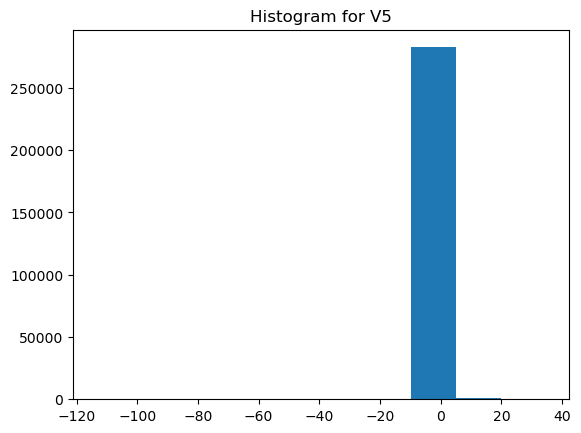

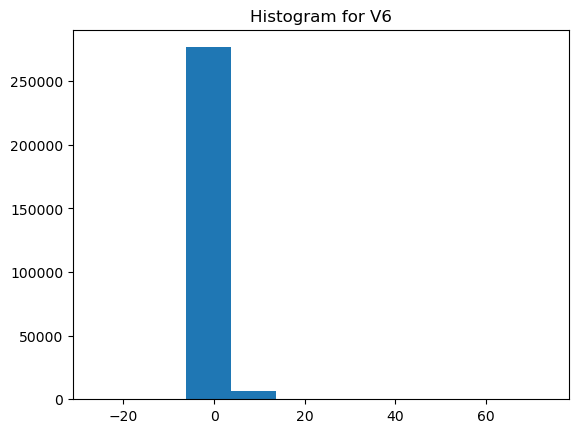

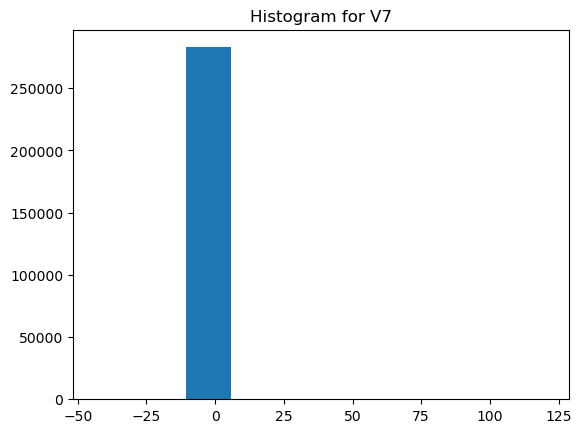

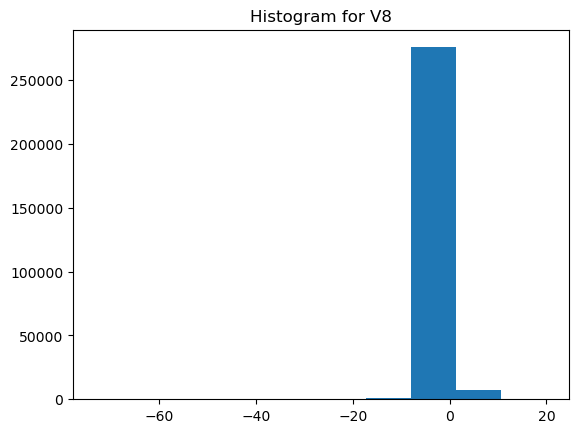

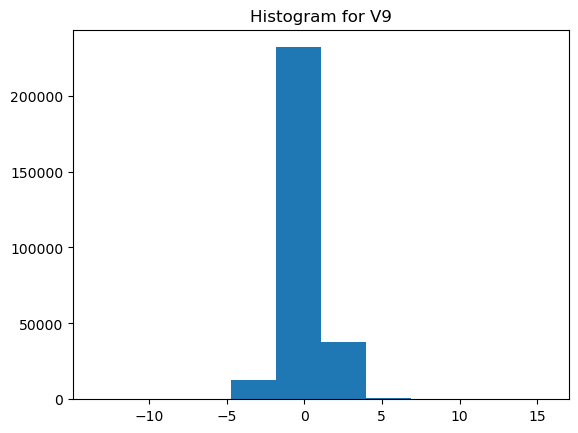

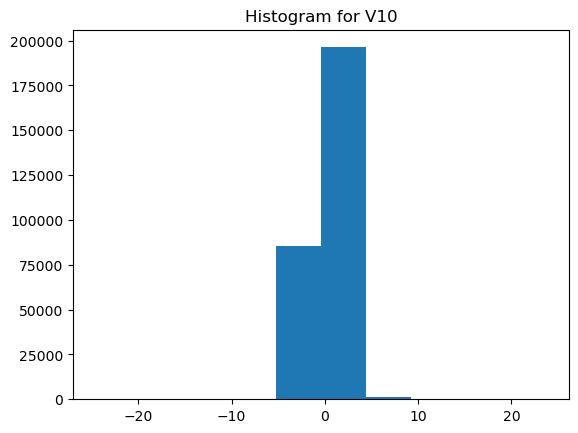

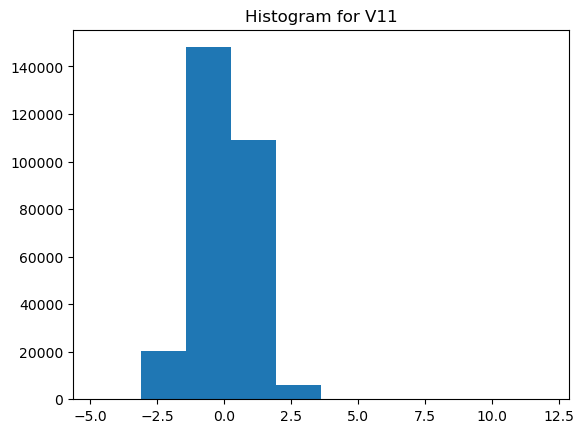

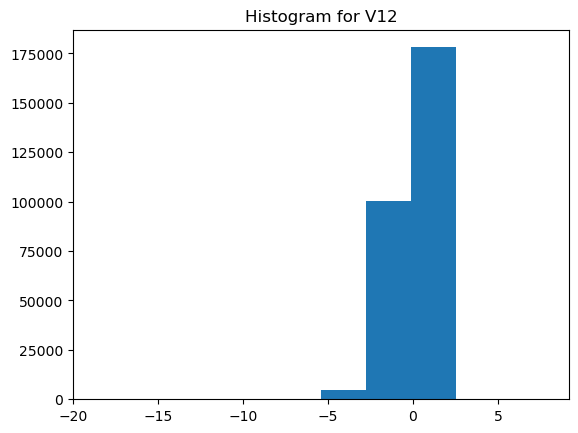

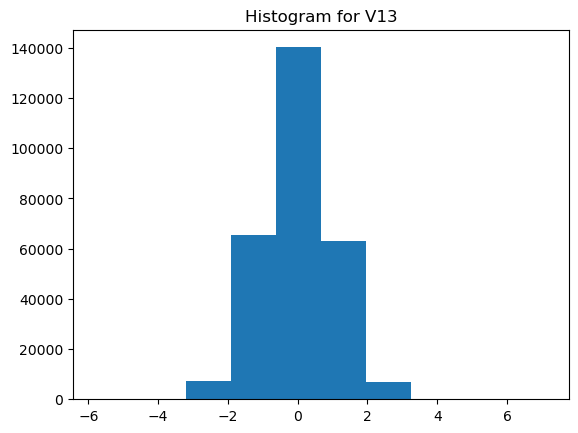

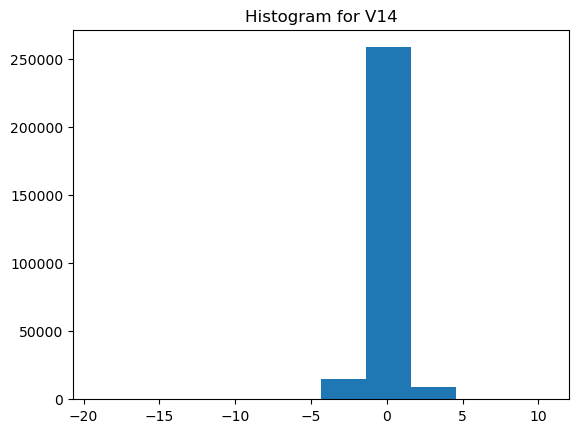

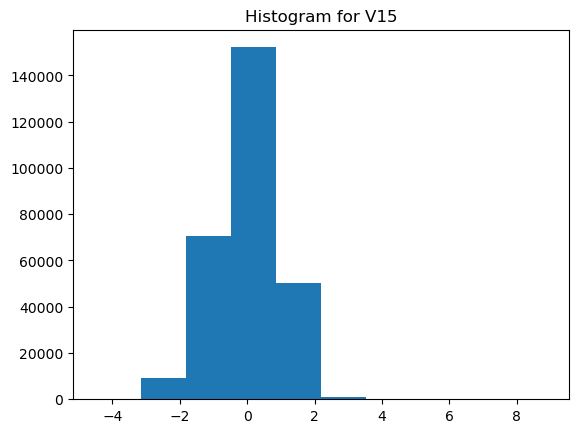

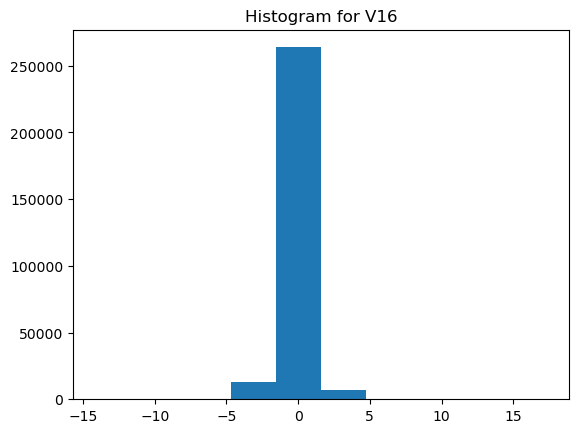

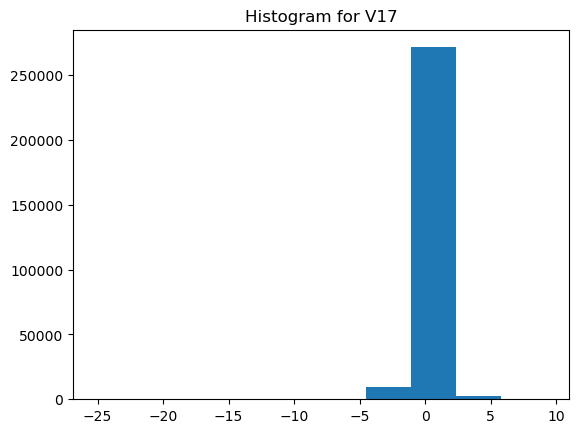

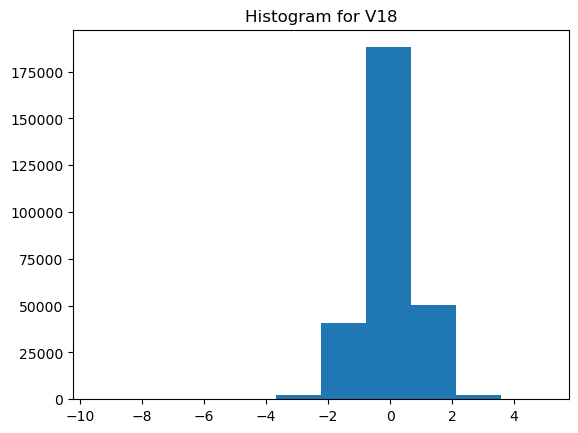

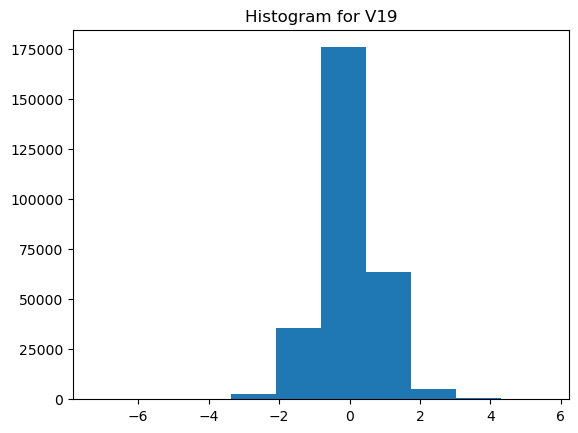

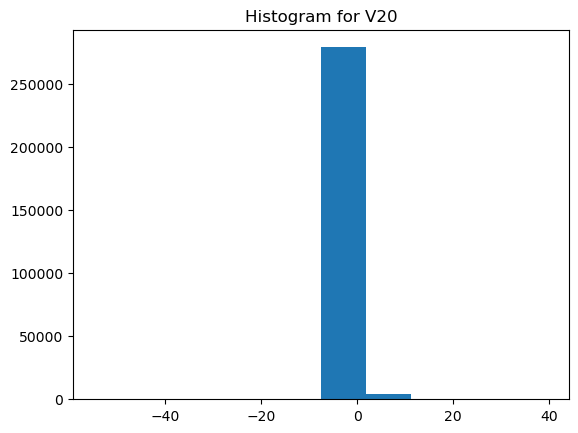

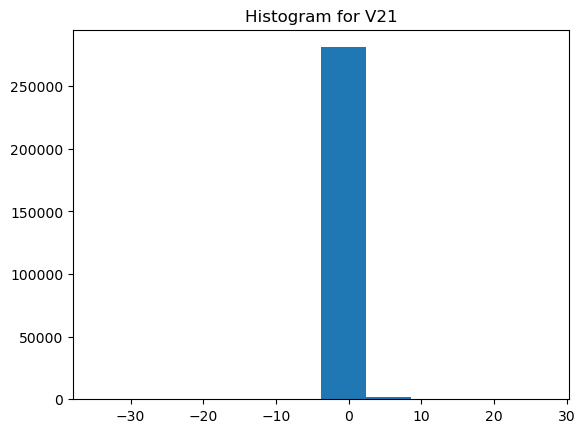

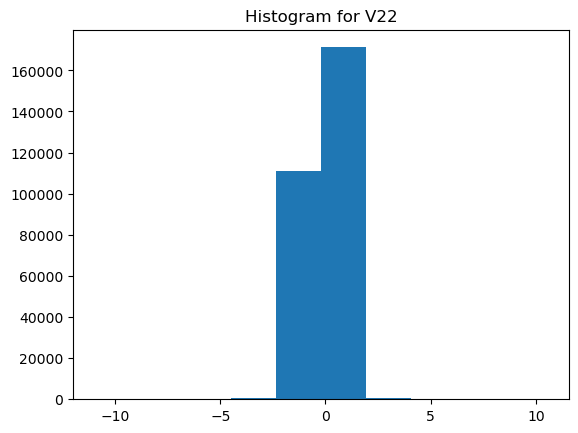

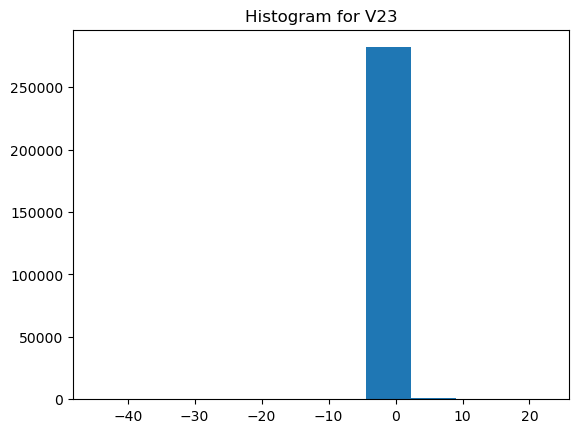

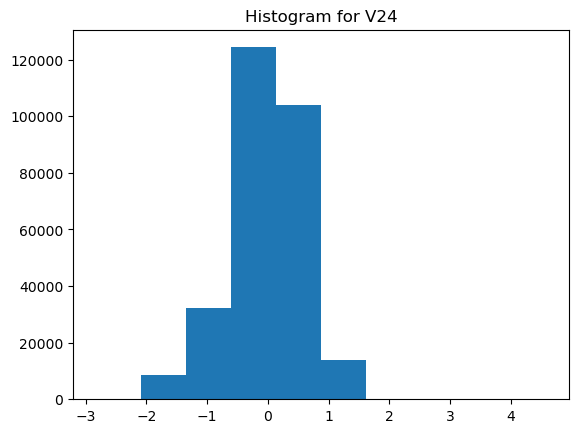

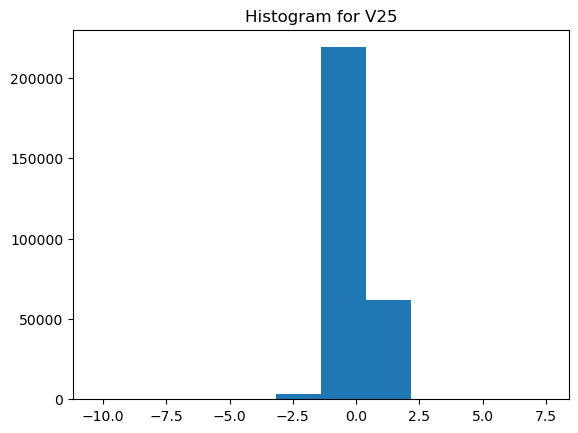

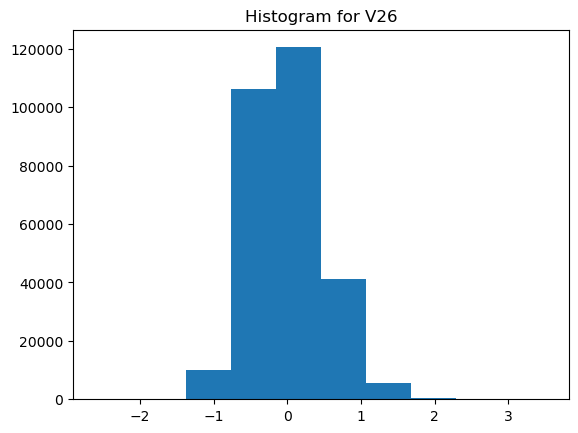

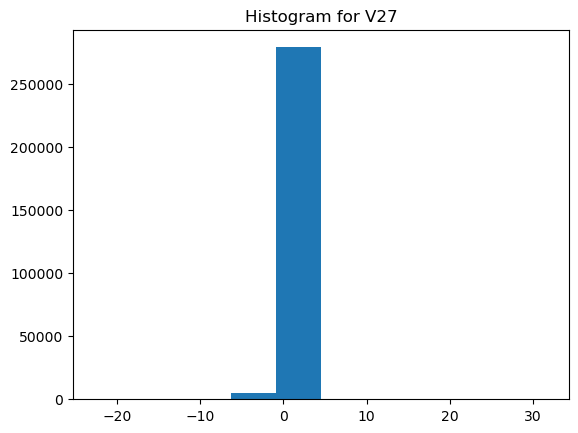

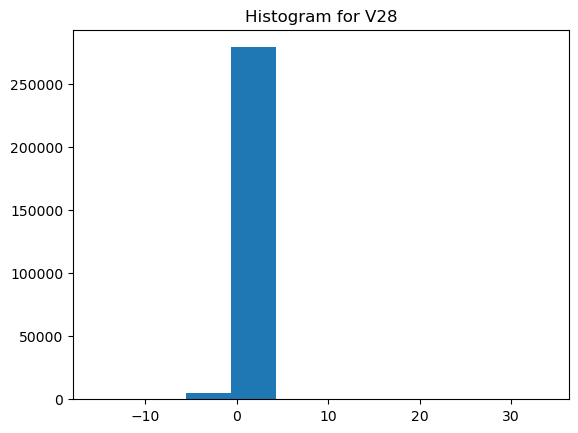

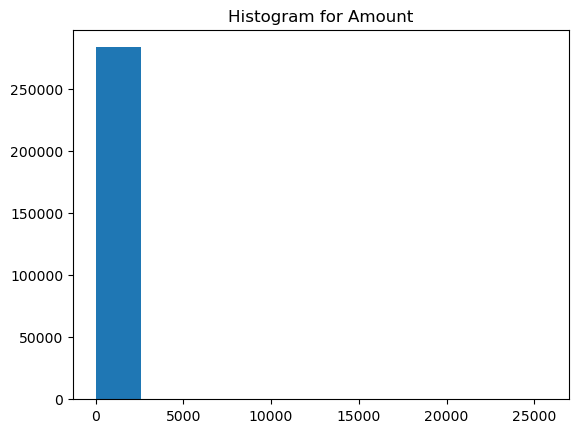

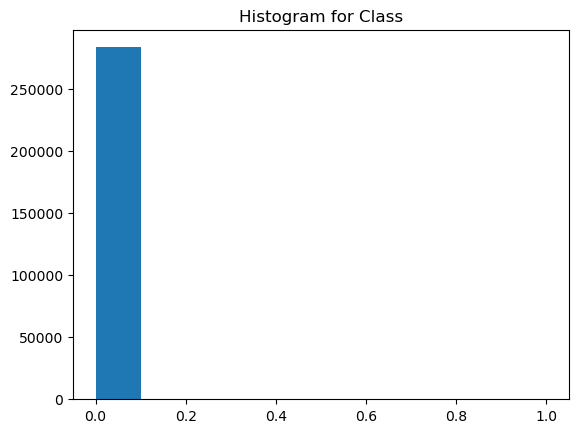

In [36]:
#plotting histogram for all columns to understand the data distribution
for i in credit_card_data.columns:
  plt.hist(x = credit_card_data[i])
  plt.title("Histogram for " + str(i))
  plt.show()

### Model Building

In [12]:
# distribution of Fruad and valid transaction
credit_card_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [13]:
#Seperating data based on catagory
valid = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [14]:
print(f"valid shape :{valid.shape}, fraud shape :{fraud.shape}")

valid shape :(283253, 31), fraud shape :(473, 31)


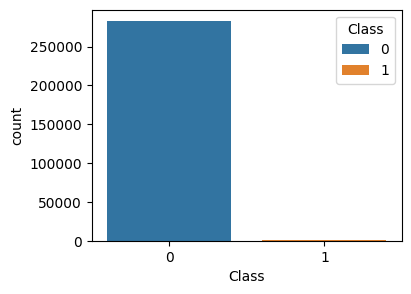

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(x=credit_card_data['Class'],hue=credit_card_data['Class']);

In [16]:
# Statstical measure of the data
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
# comparing both valid and Fraud transaction mean
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### Under Sampling

In [19]:
# Bulid a sample data from valid data

sample_Valid_data=valid.sample(n=473)

In [20]:
new_dataset = pd.concat([sample_Valid_data,fraud], axis=0)

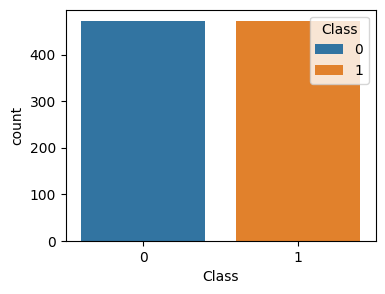

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(x=new_dataset['Class'],hue=new_dataset['Class']);

In [22]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
new_dataset.Class.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [24]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92339.608879,0.054448,-0.067920,-0.002198,-0.055016,0.130921,0.036872,0.063829,-0.070213,-0.012484,...,0.013883,0.01656,-0.002524,-0.038790,-0.024243,0.003356,-0.017064,0.010201,0.000299,96.536892
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### Splitting the data into features and Targets

In [25]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset.Class

#### Train and Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

#### Model Training

In [27]:
Logistic_model = LogisticRegression()

In [29]:
# traing the Model
Logistic_model.fit(x_train,y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Accuracy Scores 

In [30]:
# Evaluation on train data
x_train_prediction = Logistic_model.predict(x_train)

In [31]:
x_train_score = accuracy_score(x_train_prediction,y_train)
x_train_score

0.9272486772486772

In [32]:
# Evaluation On Test Data
x_test_predict = Logistic_model.predict(x_test)

In [33]:
x_test_score = accuracy_score(x_test_predict,y_test)
x_test_score

0.9368421052631579

In [34]:
# Evaluation on total data
x=credit_card_data.drop(columns='Class',axis=1)
y=credit_card_data.Class
predict = Logistic_model.predict(x)

In [35]:
score = accuracy_score(predict,y)
score

0.9646948111910787

#### Confusion Matrices 

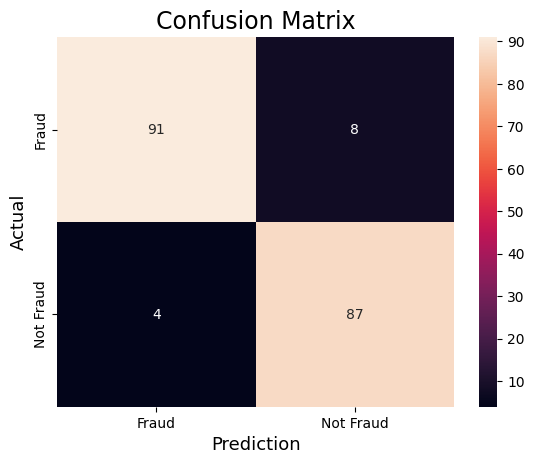

In [36]:
cm = confusion_matrix(x_test_predict,y_test)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Fraud','Not Fraud'],
            yticklabels=['Fraud','Not Fraud'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

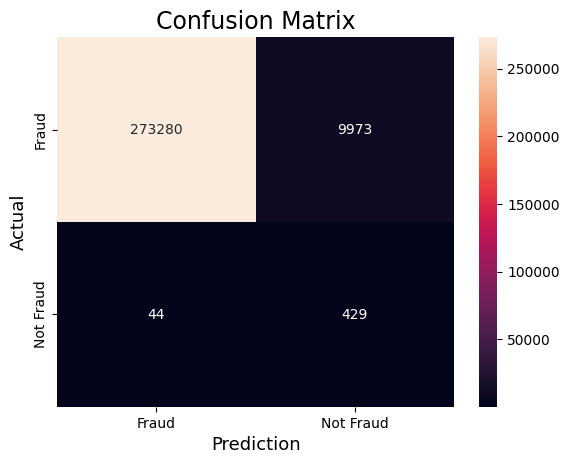

In [37]:
cm = confusion_matrix(y,predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Fraud','Not Fraud'],
            yticklabels=['Fraud','Not Fraud'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Precision 

In [38]:
precision1 = precision_score(x_test_predict, y_test)
print(precision1)

0.9157894736842105


In [39]:
precision = precision_score(predict, y)
print(precision)

0.9069767441860465


#### F1 Score

In [40]:
F1_score = f1_score(x_test_predict, y_test)
print(F1_score)

0.9354838709677419


In [41]:
# Classification Report
Report = classification_report(y,predict)

In [42]:
print(Report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    283253
           1       0.04      0.91      0.08       473

    accuracy                           0.96    283726
   macro avg       0.52      0.94      0.53    283726
weighted avg       1.00      0.96      0.98    283726



### Model Dumping using joblib

In [43]:
model_and_metrics = {
    'model': Logistic_model,
    'f1_score': F1_score,
    'precision_score': precision,
    'Accuracy' : x_test_score
}

In [44]:
#saving the model using joblib
joblib_file = 'Credit_card_detection.joblib'
joblib.dump(model_and_metrics, joblib_file)

['Credit_card_detection.joblib']

### Model dumping using Pickle 

In [52]:
model_filename = 'credit_card_fraud_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_and_metrics, file)

### Random Forest Algorithm 

In [2]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

In [70]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
pred = RFC.predict(x_test)
score = accuracy_score(pred,y_test)
score

0.9263157894736842

### Naive Bayes Algorithm

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [73]:
gnb.fit(x_train, y_train)

GaussianNB()

In [74]:
predictgnb = gnb.predict(x_test)

In [75]:
score = accuracy_score(predictgnb, y_test)
score

0.8526315789473684